In [66]:
import pandas as pd
import numpy as np
import json
import collections
import matplotlib.pyplot as plt

In [3]:
#VLSP 2016

In [4]:
def read_data(path):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return data

In [5]:
vlsp2016_train = read_data('./data/ner_vlsp2016/train.json')
vlsp2016_dev = read_data('./data/ner_vlsp2016/dev.json')
vlsp2016_test = read_data('./data/ner_vlsp2016/test.json')

In [8]:
print(len(vlsp2016_train))
print(len(vlsp2016_dev))
print(len(vlsp2016_test))

14860
1999
2829


In [9]:
def filter_entity(data, entity_keep):
    tmp = []
    total_entity_keep = 0
    for i in data:
        sentence = i['sentence']
        label = i['label']
        if not label:
            tmp.append({
                'sentence': sentence,
                'label': []
            })
        else:
            new_label = []
            for span in label:
                if span[2] == entity_keep:
                    new_label.append(span)
            total_entity_keep += len(new_label)
            tmp.append({
                'sentence': sentence,
                'label': new_label
            })
    print(f"Total entity of data: {total_entity_keep}")
    return tmp

In [10]:
vlsp2016_train = filter_entity(vlsp2016_train, "PER")
vlsp2016_dev = filter_entity(vlsp2016_dev, "PER")
vlsp2016_test = filter_entity(vlsp2016_test, "PER")

Total entity of data: 6730
Total entity of data: 748
Total entity of data: 1294


In [11]:
def check_sentence_not_entity(data):
    count_entity = 0
    for i in data:
        if not i['label']:
            count_entity += 1
    print(f"Ratio total sentence empty entity and data: {count_entity/len(data)}")


In [12]:
check_sentence_not_entity(vlsp2016_train)
check_sentence_not_entity(vlsp2016_dev)
check_sentence_not_entity(vlsp2016_test)

Ratio total sentence empty entity and data: 0.6686406460296097
Ratio total sentence empty entity and data: 0.7143571785892946
Ratio total sentence empty entity and data: 0.6956521739130435


In [13]:
def filter_sentence_empty_entity(data):
    new_data = []
    for i in data:
        if not i['label']:
            continue
        else:
            new_data.append(i)
    print(f"Length of data after filter: {len(new_data)}")
    return new_data

In [14]:
vlsp2016_train = filter_sentence_empty_entity(vlsp2016_train)
vlsp2016_dev = filter_sentence_empty_entity(vlsp2016_dev)
vlsp2016_test = filter_sentence_empty_entity(vlsp2016_test)

Length of data after filter: 4924
Length of data after filter: 571
Length of data after filter: 861


In [16]:
def format_entity(data):
    new_data = []
    for i in data:
        label = i['label']
        if not label:
            new_data.append(i)
        else:
            new_label = []
            for span in label:
                span[2] = 'PERSON'
                new_label.append(span)
            new_data.append({
                'sentence': i['sentence'],
                'label': new_label
            })
    return new_data

In [17]:
vlsp2016_train = format_entity(vlsp2016_train)
vlsp2016_dev = format_entity(vlsp2016_dev)
vlsp2016_test = format_entity(vlsp2016_test)

In [18]:
vlsp2016_train[:5]

[{'sentence': 'Chúng_tôi lên_đường ngay khi nhận được email của ngài Noel Choong - trưởng đại_diện của Cơ_quan Hàng_hải quốc_tế ( IMB ) tại Malaysia - đồng_ý tiếp chúng_tôi để cung_cấp những thông_tin mới nhất về hải_tặc eo_biển Malacca .',
  'label': [[9, 10, 'PERSON']]},
 {'sentence': 'Người lái thuyền Indonesia tên Dony tỏ ra hài_hước : “ Ở Batam về đêm tôi có_thể nhìn thấy nhà bạn tôi bên Singapore đỏ_đèn hay chưa ... ” .',
  'label': [[5, 5, 'PERSON']]},
 {'sentence': 'Khi nghe chúng_tôi kể về quán cà_phê với những thuỷ_thủ thất_nghiệp , Sitompul M. , phóng_viên chuyên_trách về eo_biển Malacca của tờ Batam Pos , nói : “ Đấy là điểm hẹn của những tay thuỷ_thủ thất_nghiệp .',
  'label': [[12, 13, 'PERSON']]},
 {'sentence': 'Trong những lần gọi điện hẹn gặp Sitompul M. , anh luôn thay_đổi điểm hẹn một hai lần trước khi đến chỗ hẹn chính_thức .',
  'label': [[7, 8, 'PERSON']]},
 {'sentence': '“ Ở đây luôn có tai_mắt của cướp_biển , chúng sẵn_sàng ném chúng_tôi cho cá_mập ăn chỉ vì một

In [19]:
def write_data_spacy_format(data, path):
    with open(path, 'w', encoding='utf-8') as f:
        for i in data:
            json.dump(i, f)
            f.write('\n')

In [20]:
write_data_spacy_format(vlsp2016_train, './pername/vlsp2016_train.json')
write_data_spacy_format(vlsp2016_dev, './pername/vlsp2016_dev.json')
write_data_spacy_format(vlsp2016_test, './pername/vlsp2016_test.json')

In [24]:
#Vin AI Covid

In [21]:
vinai_train = read_data('./data/ner_covid19/train.json')
vinai_dev = read_data('./data/ner_covid19/dev.json')
vinai_test = read_data('./data/ner_covid19/test.json')

In [22]:
print(len(vinai_train))
print(len(vinai_dev))
print(len(vinai_test))

5027
2000
3000


In [23]:
vinai_train = filter_entity(vinai_train, "NAME")
vinai_dev = filter_entity(vinai_dev, "NAME")
vinai_test = filter_entity(vinai_test, "NAME")

Total entity of data: 349
Total entity of data: 188
Total entity of data: 318


In [24]:
check_sentence_not_entity(vinai_train)
check_sentence_not_entity(vinai_dev)
check_sentence_not_entity(vinai_test)

Ratio total sentence empty entity and data: 0.9427093694052119
Ratio total sentence empty entity and data: 0.9185
Ratio total sentence empty entity and data: 0.9196666666666666


In [25]:
vinai_train = filter_sentence_empty_entity(vinai_train)
vinai_dev = filter_sentence_empty_entity(vinai_dev)
vinai_test = filter_sentence_empty_entity(vinai_test)

Length of data after filter: 288
Length of data after filter: 163
Length of data after filter: 241


In [27]:
vinai_train = format_entity(vinai_train)
vinai_dev = format_entity(vinai_dev)
vinai_test = format_entity(vinai_test)

In [28]:
vinai_train[:5]

[{'sentence': 'Trường_hợp bệnh_nhân 188 L.T.H. , theo thông_tin từ cơ_quan y_tế địa_phương , bệnh_nhân về nhà ngày 14 - 4 và từ đó chỉ tiếp_xúc với chồng và con , đây không phải là tái_nhiễm mà do có_thể virus yếu ở thời_điểm lấy mẫu lần trước , hoặc vị_trí lấy mẫu , thời_điểm lấy mẫu dẫn đến âm_tính giả .',
  'label': [[3, 3, 'PERSON']]},
 {'sentence': 'Trong đó đáng chú_ý có bệnh_nhân 116 N.X.T. - bác_sĩ của Bệnh_viện Bệnh nhiệt_đới trung_ương , và bệnh_nhân 21 N.Q.T. - người đi chuyến máy_bay VN 0054 về Việt_Nam rạng sáng 2 - 3 cùng đoàn bộ_trưởng Bộ Kế_hoạch - đầu_tư Nguyễn_Chí_Dũng và bệnh_nhân 17 .',
  'label': [[7, 7, 'PERSON'], [19, 19, 'PERSON'], [41, 41, 'PERSON']]},
 {'sentence': 'Khoa chị M. làm_việc đang còn hơn 10 bệnh_nhân và hơn 10 nhân_viên y_tế đang trực_chiến .',
  'label': [[2, 2, 'PERSON']]},
 {'sentence': 'Bệnh_nhân thứ 19 và 20 là bác gái và lái_xe của Nhung .',
  'label': [[11, 11, 'PERSON']]},
 {'sentence': 'Ông Chung cũng thông_tin theo xác_định sơ_bộ thời_gia

In [29]:
write_data_spacy_format(vinai_train, './pername/vinai_train.json')
write_data_spacy_format(vinai_dev, './pername/vinai_dev.json')
write_data_spacy_format(vinai_test, './pername/vinai_test.json')

In [30]:
def parsing(label):
    stack=[]
    obj=[]
    for i,lb in enumerate(label):
        if lb[0]=='B':
            if len(stack)==0:
                start=i
                stack.append(lb[2:])
            elif label[i-1][0]!='O':
                end=i-1
                entity=stack.pop()
                x=[start,end,entity]
                stack.append(lb[2:])
                start=i
                obj.append(x)
            if i==len(label)-1:
                end=i
                entity=stack.pop()
                x=[start,end,entity]
                obj.append(x)
        elif lb=='O' :
            if i>0 and label[i-1][0]!='O' :
                end=i-1
                entity=stack.pop()
                x=[start,end,entity]
                obj.append(x)
        else:
            if i==len(label)-1:
                end=i
                entity=stack.pop()
                x=[start,end,entity]
                obj.append(x)
    return obj

In [31]:
def read_syllables_datat_to_iob(path):
    data = []
    tokens = []
    label = []
    with open(path, 'r', encoding='utf-8') as f:
        for i in f.readlines():
            if not i.strip():
                sentence = " ".join(tokens)
                data.append({
                    'sentence': sentence,
                    'label': label
                })
                tokens = []
                label = []
            else:
                tokens.extend(i.strip().split(" ")[:-1])
                label.append(i.strip().split(" ")[-1])
    return data

In [32]:
vlsp2018_train = read_syllables_datat_to_iob('data/ner_vlsp2018/person_name_train_syllables_vlsp2018.txt')
vlsp2018_dev = read_syllables_datat_to_iob('data/ner_vlsp2018/person_name_dev_syllables_vlsp2018.txt')
vlsp2018_test = read_syllables_datat_to_iob('data/ner_vlsp2018/person_name_test_syllables_vlsp2018.txt')

In [33]:
def iob2spacy(data):
    for idx, sample in enumerate(data):
        label = parsing(sample['label'])
        sample['label'] = label
        data[idx] = sample
    return data

In [34]:
vlsp2018_train = iob2spacy(vlsp2018_train)
vlsp2018_dev = iob2spacy(vlsp2018_dev)
vlsp2018_test = iob2spacy(vlsp2018_test)

In [35]:
print(len(vlsp2018_train))
print(len(vlsp2018_dev))
print(len(vlsp2018_test))

4554
1565
2262


In [36]:
vlsp2018_train = filter_entity(vlsp2018_train, "PERSON")
vlsp2018_dev = filter_entity(vlsp2018_dev, "PERSON")
vlsp2018_test = filter_entity(vlsp2018_test, "PERSON")

Total entity of data: 6427
Total entity of data: 2168
Total entity of data: 3518


In [37]:
check_sentence_not_entity(vlsp2018_train)
check_sentence_not_entity(vlsp2018_dev)
check_sentence_not_entity(vlsp2018_test)

Ratio total sentence empty entity and data: 0.0
Ratio total sentence empty entity and data: 0.0
Ratio total sentence empty entity and data: 0.0


In [38]:
vlsp2018_train = format_entity(vlsp2018_train)
vlsp2018_dev = format_entity(vlsp2018_dev)
vlsp2018_test = format_entity(vlsp2018_test)

In [39]:
vlsp2018_train[:5]

[{'sentence': "Đây là lý do khiến Yoon Ah quyết định cắt mái tóc dài ' nữ thần '",
  'label': [[5, 6, 'PERSON']]},
 {'sentence': 'Mái tóc cũ của thành viên SNSD bị hư hỏng nặng nề và Yoon Ah thậm chí không muốn nuôi tóc lại .',
  'label': [[13, 14, 'PERSON']]},
 {'sentence': 'Sau khi kết thúc kỳ quảng bá cho album kỷ niệm 10 năm , Yoon Ah gây sốc vì cắt phăng mái tóc dài , để kiểu đầu bob lạ lẫm .',
  'label': [[14, 15, 'PERSON']]},
 {'sentence': 'Nhiều fan lo lắng có phải Yoon Ah đã gặp vấn đề tâm lý nào đó nên mới quyết định thay đổi .',
  'label': [[6, 7, 'PERSON']]},
 {'sentence': 'Yoon Ah đổi phong cách với mái tóc ngắn .',
  'label': [[0, 1, 'PERSON']]}]

In [41]:
write_data_spacy_format(vlsp2018_train, './pername/vlsp2018_train.json')
write_data_spacy_format(vlsp2018_dev, './pername/vlsp2018_dev.json')
write_data_spacy_format(vlsp2018_test, './pername/vlsp2018_test.json')

In [42]:
final_train = []
final_train.extend(vlsp2016_train)
final_train.extend(vlsp2018_train)
final_train.extend(vinai_train)

final_dev = []
final_dev.extend(vlsp2016_dev)
final_dev.extend(vlsp2018_dev)
final_dev.extend(vinai_dev)

final_test = []
final_test.extend(vlsp2016_test)
final_test.extend(vlsp2018_test)
final_test.extend(vinai_test)

In [43]:
write_data_spacy_format(final_train, './pername/final_train.json')
write_data_spacy_format(final_dev, './pername/final_dev.json')
write_data_spacy_format(final_test, './pername/final_test.json')

In [47]:
print(len(final_train))
print(len(final_dev))
print(len(final_test))

9766
2299
3364


In [44]:
def check_label(data):
    label_set = []
    for i in data:
        if not i['label']:
            continue
        else:
            label = i['label']
            for span in label:
                if span[2] not in label_set:
                    label_set.append(span[2])
    return label_set

In [45]:
check_label(vinai_train)

['PERSON']

In [80]:
def spacy2iob(data):
    new_data = []
    for i in data:
        if not i['label']:
            new_data.append(i)
        else:
            sentence = i['sentence']
            tokens = sentence.split(" ")
            label = i['label']
            iob_label = ['O']*len(tokens)
            for span in label:
                start = span[0]
                end = span[1] + 1
                for j in range(start, end):
                    if j == start:
                        iob_label[j] = 'B-'+span[2]
                    else:
                        iob_label[j] = 'I-'+span[2]
            new_data.append({
                'sentence': sentence,
                'label': iob_label
            })
    return new_data

In [83]:
vlsp2016_test = spacy2iob(vlsp2016_test)
vlsp2018_test = spacy2iob(vlsp2018_test)
vinai_test = spacy2iob(vinai_test)

In [84]:
write_data_spacy_format(vlsp2016_test, 'data/person_name/vlsp2016_iob_test.json')
write_data_spacy_format(vlsp2018_test, 'data/person_name/vlsp2018_iob_test.json')
write_data_spacy_format(vinai_test, 'data/person_name/vinai_iob_test.json')

In [48]:
def no_accent_vietnamese(s):
    s = re.sub('[áàảãạăắằẳẵặâấầẩẫậ]', 'a', s)
    s = re.sub('[ÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬ]', 'A', s)
    s = re.sub('[éèẻẽẹêếềểễệ]', 'e', s)
    s = re.sub('[ÉÈẺẼẸÊẾỀỂỄỆ]', 'E', s)
    s = re.sub('[óòỏõọôốồổỗộơớờởỡợ]', 'o', s)
    s = re.sub('[ÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢ]', 'O', s)
    s = re.sub('[íìỉĩị]', 'i', s)
    s = re.sub('[ÍÌỈĨỊ]', 'I', s)
    s = re.sub('[úùủũụưứừửữự]', 'u', s)
    s = re.sub('[ÚÙỦŨỤƯỨỪỬỮỰ]', 'U', s)
    s = re.sub('[ýỳỷỹỵ]', 'y', s)
    s = re.sub('[ÝỲỶỸỴ]', 'Y', s)
    s = re.sub('đ', 'd', s)
    s = re.sub('Đ', 'D', s)
    return s

In [49]:
import pandas as pd
import re

In [50]:
df = pd.read_excel('data/Danh-sách.xlsx')

In [51]:
df = df['Họ và Tên']

In [52]:
list_name = list(df)

In [53]:
list_name[0]

'Hồ Thị Thanh Tuyền'

In [54]:
def filter_name(data):
    new_data = []
    for i in data:
        try:
            i = re.sub('\\xa0', '', i)
            i = re.sub('\s+', ' ', i)
            new_data.append(i)
        except:
            continue
    return new_data

In [55]:
list_name = filter_name(list_name)

In [56]:
len(list_name)

686

In [57]:
new_list = []
for i in list_name:
    new_list.append(i)
    new_list.append(i.lower())
    new_list.append(no_accent_vietnamese(i))
    new_list.append(no_accent_vietnamese(i).lower())

In [58]:
len(new_list)

2744

In [59]:
with open('./pername/list_name.txt', 'w', encoding='utf-8') as f:
    for i in new_list:
        f.write('%s\n' %i)

In [88]:
def EDA_data(data):
    seq_len_tokens = []
    for i in data:
        sentence = i['sentence']
        tokens = sentence.split()
        seq_len_tokens.append(len(tokens))
    counter = dict(collections.Counter(seq_len_tokens))
#     print(counter)
    counter = dict(sorted(counter.items()))
#     print(sum(counter.values()))
#     print(counter)
    x = list(counter.keys())
    y = list(counter.values())
    plt.bar(x, y)
    plt.show()
    

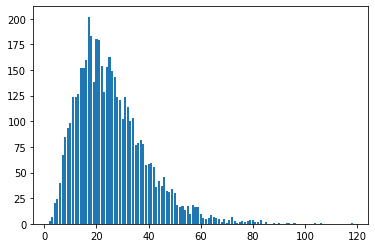

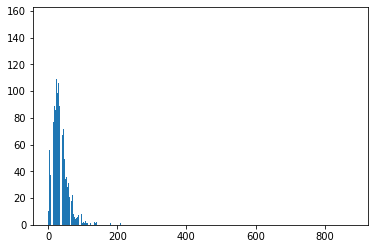

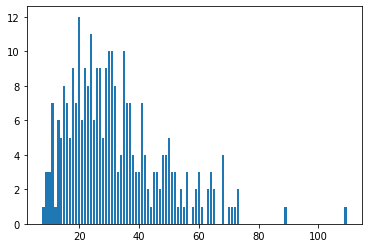

In [93]:
EDA_data(vlsp2016_train)
EDA_data(vlsp2018_train)
EDA_data(vinai_train)

In [94]:
# max_seq_len = 60

In [95]:
def filter_data(data, max_seq_len):
    new_data = []
    for i in data:
        sentence = i['sentence']
        if len(sentence.split()) > max_seq_len:
            continue
        else:
            new_data.append(i)
    print(len(new_data))
    return new_data

In [96]:
vlsp2016_train = filter_data(vlsp2016_train, 60)
vlsp2016_dev = filter_data(vlsp2016_dev, 60)
vlsp2016_test = filter_data(vlsp2016_test, 60)
vlsp2018_train = filter_data(vlsp2018_train, 60)
vlsp2018_dev = filter_data(vlsp2018_dev, 60)
vlsp2018_test = filter_data(vlsp2018_test, 60)
vinai_train = filter_data(vinai_train, 60)
vinai_dev = filter_data(vinai_dev, 60)
vinai_test = filter_data(vinai_test, 60)

4821
554
834
4130
1400
2049
269
156
225


In [97]:
def check_sentence_empty_entity(data):
    sentence_empty_entity = []
    sentence_entity = []
    for i in data:
        if i['label']:
            sentence_entity.append(i)
        else:
            sentence_empty_entity.append(i)
    print(f'total samples sentence have entity {len(sentence_entity)}')
    print(f'total samples sentence haven\'t entity {len(sentence_empty_entity)}')
    return sentence_entity, sentence_empty_entity

In [98]:
vlsp2016_train, vlsp2016_train_not_entity = check_sentence_empty_entity(vlsp2016_train)
vlsp2018_train, vlsp2018_train_not_entity = check_sentence_empty_entity(vlsp2018_train)
vinai_train, vinai_train_not_entity = check_sentence_empty_entity(vinai_train)

total samples sentence have entity 4821
total samples sentence haven't entity 0
total samples sentence have entity 4130
total samples sentence haven't entity 0
total samples sentence have entity 269
total samples sentence haven't entity 0


In [99]:
final_train = []
final_train.extend(vlsp2016_train)
final_train.extend(vlsp2018_train)
final_train.extend(vinai_train)

final_dev = []
final_dev.extend(vlsp2016_dev)
final_dev.extend(vlsp2018_dev)
final_dev.extend(vinai_dev)

final_test = []
final_test.extend(vlsp2016_test)
final_test.extend(vlsp2018_test)
final_test.extend(vinai_test)

In [132]:
print(len(final_train))
print(len(final_dev))
print(len(final_test))

9220
2110
3108


In [104]:
import random

In [133]:
write_data_spacy_format(final_train, './pername/max_seq_len_60/train_60.json')
write_data_spacy_format(final_dev, './pername/max_seq_len_60/dev_60.json')
write_data_spacy_format(final_train_gen, './pername/max_seq_len_60/test_60.json')

In [114]:
def generate_data(data, list_name):
    new_data = []
    for i in final_train:
        new_data.append(i)
        sentence = i['sentence']
        label = i['label']
        tokens = sentence.split()
        for idx, span in enumerate(label):
            tmp = label.copy()
            name = random.choice(list_name)
            name_tokens = name.split()
            new_tokens = tokens[:span[0]]+ name_tokens + tokens[span[1]+1:]
            new_sentence = ' '.join(new_tokens)
            new_label = [span[0], span[0] + len(name_tokens) - 1, span[2]]
            tmp[idx] = new_label
            new_data.append({
                'sentence': new_sentence,
                'label': tmp
            })
    return new_data
            

In [127]:
new_list.extend(['Vũ', 'Nam', 'Tony', 'Hoàng Vũ', 'Đức Huy', 'Thái sơn', 'Phí long', 'Ling', 'Trang', 'kiều trang', 'Mây Mây', 'Mee mee', 'Thịnh', 'Ronaldo', 'Trung chánh', 'Chánh', 'An', 'Sơn', 'Duy', 'Tâm', 'Thúy', 'Phương', 'Thảo', 'Tom', 'Huy', 'Hương', 'hường', 'Thắng', 'Đức','Duy Manh'])

In [128]:
final_train_gen  = generate_data(final_train, new_list)

In [131]:
write_data_spacy_format(final_train_gen, './pername/train.json')

In [146]:
def read_syllables_datat_to_iob(path):
    data = []
    tokens = []
    label = []
    with open(path, 'r', encoding='utf-8') as f:
        for i in f.readlines():
            if not i.strip():
                sentence = " ".join(tokens)
                data.append({
                    'sentence': sentence,
                    'label': label
                })
                tokens = []
                label = []
            else:
                tokens.extend(i.strip().split("\t")[:-1])
                label.append(i.strip().split("\t")[-1])
    return data

In [147]:
# synthesize data

In [148]:
book_appt = read_syllables_datat_to_iob('./data_synthesize/book_appt.txt')
cancel_appt = read_syllables_datat_to_iob('./data_synthesize/cancel_appt.txt')
change_appt = read_syllables_datat_to_iob('./data_synthesize/change_appt.txt')
infor_appt = read_syllables_datat_to_iob('./data_synthesize/infor_appt.txt')

In [150]:
book_appt = iob2spacy(book_appt)
cancel_appt = iob2spacy(cancel_appt)
change_appt = iob2spacy(change_appt)
infor_appt = iob2spacy(infor_appt)

In [152]:
print(len(book_appt))
print(len(cancel_appt))
print(len(change_appt))
print(len(infor_appt))


3519
3519
3079
2499


In [156]:
book_appt = filter_entity(book_appt, "PERSON_NAME")
cancel_appt = filter_entity(cancel_appt, "PERSON_NAME")
change_appt = filter_entity(change_appt, "PERSON_NAME")
infor_appt = filter_entity(infor_appt, "PERSON_NAME")

Total entity of data: 3199
Total entity of data: 3199
Total entity of data: 2799
Total entity of data: 1000


In [157]:
check_sentence_not_entity(book_appt)
check_sentence_not_entity(cancel_appt)
check_sentence_not_entity(change_appt)
check_sentence_not_entity(infor_appt)

Ratio total sentence empty entity and data: 0.09093492469451549
Ratio total sentence empty entity and data: 0.09093492469451549
Ratio total sentence empty entity and data: 0.09093861643390712
Ratio total sentence empty entity and data: 0.5998399359743898


In [158]:
book_appt = format_entity(book_appt)
cancel_appt = format_entity(cancel_appt)
change_appt = format_entity(change_appt)
infor_appt = format_entity(infor_appt)


In [160]:
data_synth = []
data_synth.extend(book_appt)
data_synth.extend(cancel_appt)
data_synth.extend(change_appt)
data_synth.extend(infor_appt)

In [161]:
len(data_synth)

12616

In [163]:
write_data_spacy_format(data_synth, './data_synthesize/data_synth.json')